**Goal**

Top 10 richest regions & countries in GDP per capita (wealth created per habitant) and in GDP current (total wealth created by the country)

**Data**

GDP CURRENT

GDP PER CAPITA

by countries, agregated by region

**Sources**

World Bank national accounts data,

OECD National Accounts data files.

**Notes**

The top 10 for GDP current is including the G8, should the European Union be included in this ranking, it would come up 2nd biggest economy after the USA. 

In the top 10 for GDP per capita, the ranking include smaller countries, only the USA remains in this ranking from the GDP current ranking.

**Step 1 : Import**

In [1]:
import pandas as pd
from pandas_datareader import wb

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


**Step 2 : Get all countries**

In [2]:
countries = wb.get_countries()
countries = countries.set_index('name')
countries

,iso3c,iso2c,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
name,,,,,,,,,
Aruba,ABW,AW,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.51670
Afghanistan,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.52280
Africa,AFR,A9,Aggregates,,Aggregates,Aggregates,,NaN,NaN
Angola,AGO,AO,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IBRD,Luanda,13.2420,-8.81155
Albania,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.33170
...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa excluding South Africa and Nigeria,XZN,A5,Aggregates,,Aggregates,Aggregates,,NaN,NaN
"Yemen, Rep.",YEM,YE,Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.35200
South Africa,ZAF,ZA,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.74600


**Step 3 : Get GDP per capita data and keep top 10**


In [3]:
data_gdp_capita = wb.download(indicator=['NY.GDP.PCAP.CD'], country='all', start=2018, end=2018)
data_gdp_capita.index = data_gdp_capita.index.droplevel(1)
data_gdp_capita = data_gdp_capita.dropna()
data_gdp_capita.columns = ['GDP / capita']
data_gdp_capita = data_gdp_capita.sort_values('GDP / capita', ascending=False)
data_gdp_capita = data_gdp_capita.head(10)
data_gdp_capita = pd.merge(data_gdp_capita, countries['region'], left_index=True, right_index=True)
data_gdp_capita

,GDP / capita,region
Monaco,185741.279992,Europe & Central Asia
Luxembourg,116639.888047,Europe & Central Asia
"Macao SAR, China",87208.535913,East Asia & Pacific
Switzerland,82796.547163,Europe & Central Asia
Norway,81697.245984,Europe & Central Asia
Ireland,78806.431996,Europe & Central Asia
Iceland,73191.116315,Europe & Central Asia
Qatar,68793.784437,Middle East & North Africa
Singapore,64581.944018,East Asia & Pacific
United States,62794.585652,North America


**Step 4 : Get current  GDP and keep top 10**

In [4]:
data_current_gdp = wb.download(indicator=['NY.GDP.MKTP.CD'], country='all', start=2018, end=2018)
data_current_gdp.index = data_current_gdp.index.droplevel(1)
data_current_gdp = data_current_gdp.dropna()
data_current_gdp.columns = ['Current GDP']
data_current_gdp = pd.merge(data_current_gdp, countries['region'], left_index=True, right_index=True)
data_current_gdp = data_current_gdp[data_current_gdp.region != 'Aggregates']
data_current_gdp = data_current_gdp.sort_values('Current GDP', ascending=False)
data_current_gdp = data_current_gdp.head(10)
data_current_gdp

,Current GDP,region
United States,2.054434e+13,North America
China,1.360815e+13,East Asia & Pacific
Japan,4.971323e+12,East Asia & Pacific
Germany,3.947620e+12,Europe & Central Asia
United Kingdom,2.855297e+12,Europe & Central Asia
France,2.777535e+12,Europe & Central Asia
India,2.718732e+12,South Asia
Italy,2.083864e+12,Europe & Central Asia
Brazil,1.868626e+12,Latin America & Caribbean
Canada,1.713342e+12,North America


**Step 4 : Visualize data with bar charts**

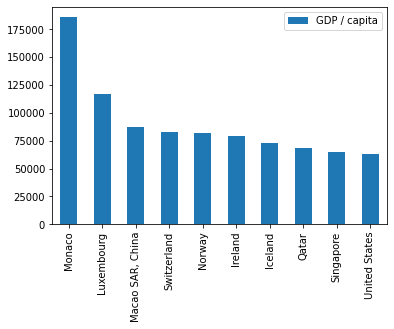

In [5]:
data_gdp_capita.plot(kind='bar')

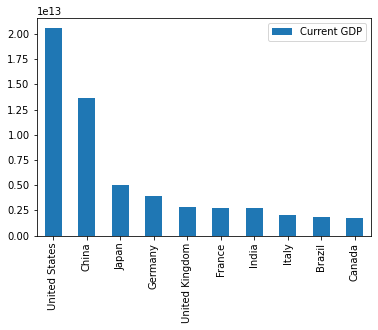

In [6]:
data_current_gdp.plot(kind='bar')

**Step 5 : Group by region**

In [7]:
data_regions = data_current_gdp.groupby(['region']).mean()
data_regions['GDP / country'] = data_gdp_capita.groupby(['region']).mean()
data_regions

,Current GDP,GDP / country
region,,
East Asia & Pacific,9.289737e+12,75895.239966
Europe & Central Asia,2.916079e+12,103145.418250
Latin America & Caribbean,1.868626e+12,NaN
North America,1.112884e+13,62794.585652
South Asia,2.718732e+12,NaN
